In [78]:
#import pandas, seaborn, matplotlib, sklearn 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Load Data

In [79]:
df = pd.read_csv ("ford.csv")

display (df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


#### Dealing with categorical variables

In [80]:
#checking the names and length of model, transmission & fuelType

print(df['model'].unique())
print (len(df['model'].unique()))

print(df['transmission'].unique())
print (len(df['transmission'].unique()))

print(df['fuelType'].unique())
print (len(df['fuelType'].unique()))

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
23
['Automatic' 'Manual' 'Semi-Auto']
3
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']
5


#### Data Aggregation

In [81]:
#grouping car models on basis of price

df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg.round (2))

,count,mean,sum
model,,,
B-MAX,355,8287.53,2942072
C-MAX,543,9914.57,5383610
EcoSport,1143,12499.27,14286664
Edge,208,22810.50,4744584
Escort,1,3000.00,3000
Fiesta,6556,10196.86,66850631
Focus,4588,13185.88,60496831
Fusion,16,2555.81,40893
Galaxy,228,17841.87,4067947


#### Data preprocessing before visualization

In [82]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# # remove the 'count' column
# df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,count,mean,sum,percent_of_cars
model,,,,
Fiesta,6556,10196.86,66.85,36.50
Focus,4588,13185.88,60.50,25.54
Kuga,2225,15823.47,35.21,12.39
EcoSport,1143,12499.27,14.29,6.36
C-MAX,543,9914.57,5.38,3.02


#### Barplots: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

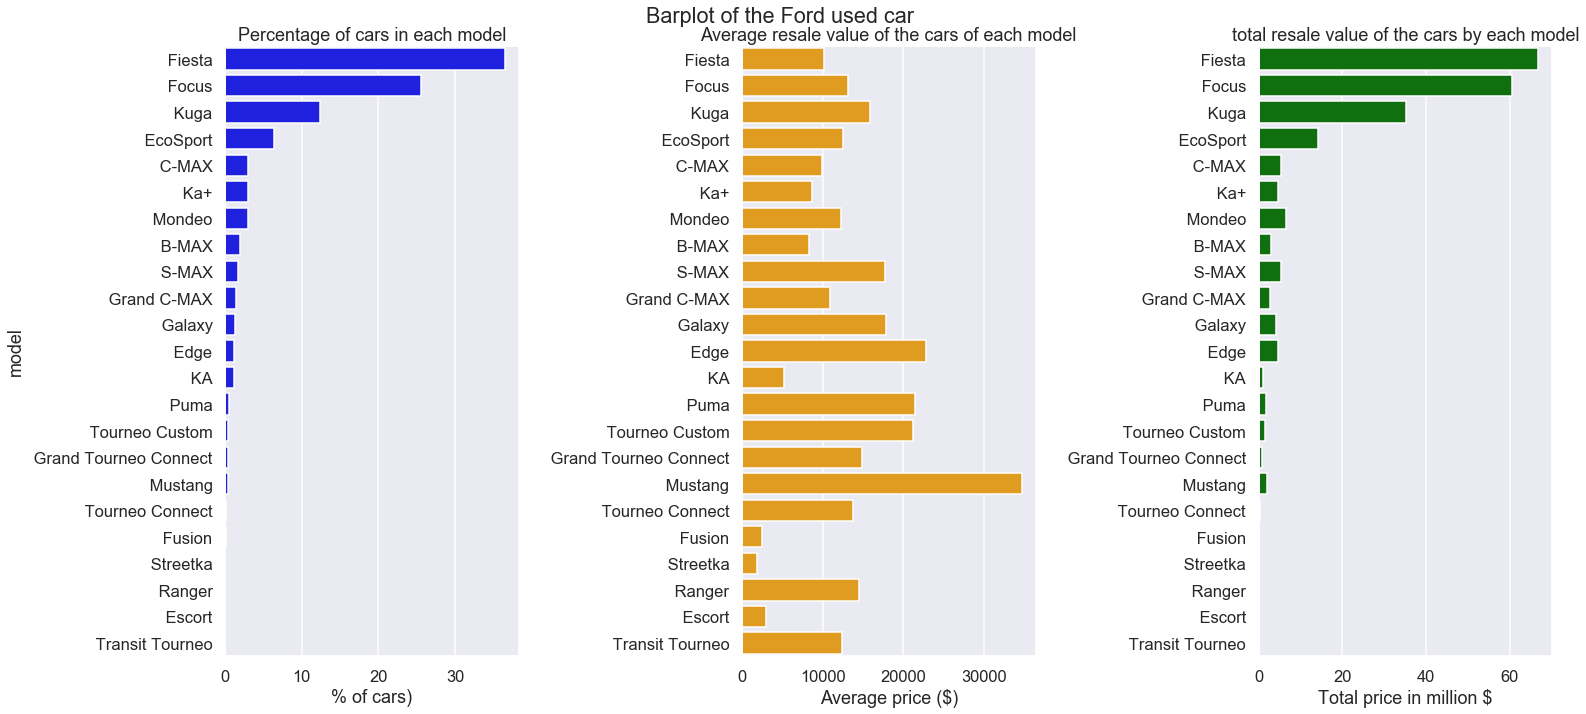

In [83]:
sns.set_context("talk")
sns.set_style("darkgrid")

plt.figure(figsize=(22,10))

plt.subplot (1, 3, 1)
sns.barplot(x='percent_of_cars', y= df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("% of cars)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y= df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y= df_agg.index, data=df_agg, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car", y = 1.0)
plt.tight_layout()
plt.show()

**What are the top 5 selling car models/transmission/fuelType in the dataset?**
<br> Fiesta, Focus, Kuga, EcoSport, C-Max
<br>**What's the average selling price of the top 5 selling car models/transmission/fuelType?**
<br> 12,324 USD per car
<br>**What's the total sale of the top 5 selling car models/transmission/fuelType?**
<br> 83.81 million USD

#### Label Encoding

In [84]:
LE = LabelEncoder ()

df["transmission_"] = LE.fit_transform(df["transmission"])
print (LE.classes_)
print (df["transmission_"].unique()) 

df["model_"] = LE.fit_transform(df["model"])
print (LE.classes_)
print (df["model_"].unique()) 

df["fuelType_"] = LE.fit_transform(df["fuelType"])
print (LE.classes_)
print (df["fuelType_"].unique())

display(df.sample(10))

['Automatic' 'Manual' 'Semi-Auto']
[0 1 2]
[' B-MAX' ' C-MAX' ' EcoSport' ' Edge' ' Escort' ' Fiesta' ' Focus'
 ' Fusion' ' Galaxy' ' Grand C-MAX' ' Grand Tourneo Connect' ' KA' ' Ka+'
 ' Kuga' ' Mondeo' ' Mustang' ' Puma' ' Ranger' ' S-MAX' ' Streetka'
 ' Tourneo Connect' ' Tourneo Custom' ' Transit Tourneo']
[ 5  6 16 13  2  1 14 12 21 18  0  3 20  9 11  8 15 10  7 17 19  4 22]
['Diesel' 'Electric' 'Hybrid' 'Other' 'Petrol']
[4 0 2 1 3]


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,transmission_,model_,fuelType_
3846,Focus,2018,13997,Manual,17734,Petrol,57.7,1.0,1,6,4
7306,Galaxy,2017,19998,Manual,15037,Diesel,56.5,2.0,1,8,0
8626,Fiesta,2019,15290,Manual,7144,Petrol,58.9,1.0,1,5,4
5141,EcoSport,2016,8590,Manual,23689,Diesel,64.2,1.5,1,2,0
2822,Mondeo,2017,15822,Automatic,13402,Diesel,58.9,2.0,0,14,0
3613,Fiesta,2015,6597,Manual,44787,Petrol,54.3,1.2,1,5,4
17249,Fiesta,2010,2998,Manual,94000,Petrol,50.4,1.2,1,5,4
7976,Mondeo,2019,19000,Manual,4675,Diesel,62.8,2.0,1,14,0
9731,Fiesta,2019,13250,Manual,14165,Petrol,65.7,1.0,1,5,4
1913,Kuga,2014,8795,Manual,56989,Diesel,53.3,2.0,1,13,0


In [85]:
#checking datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 11 columns):
model            17964 non-null object
year             17964 non-null int64
price            17964 non-null int64
transmission     17964 non-null object
mileage          17964 non-null int64
fuelType         17964 non-null object
mpg              17964 non-null float64
engineSize       17964 non-null float64
transmission_    17964 non-null int32
model_           17964 non-null int32
fuelType_        17964 non-null int32
dtypes: float64(2), int32(3), int64(3), object(3)
memory usage: 1.3+ MB


#### Pivot Table

In [86]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
B-MAX,355,8287.526761,2942072
C-MAX,543,9914.567219,5383610
EcoSport,1143,12499.268591,14286664
Edge,208,22810.500000,4744584
Escort,1,3000.000000,3000
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Fusion,16,2555.812500,40893
